# **Exploratory Data Analysis (EDA) on Anxiety Attack Severity**
## Understanding How Lifestyle and Demographics Influence Anxiety
This project explores how factors like sleep, occupation, diet, and stress contribute to the severity of anxiety attacks.

## **Key Questions:**
1. **Which demographic groups are most affected by anxiety attacks?**  
   - Does age, gender, or occupation play a significant role?
2. **How do lifestyle habits impact anxiety severity?**  
   - Does **sleep duration**, **physical activity**, or **diet quality** correlate with stress and anxiety?
3. **How does stress level correlate with physiological responses?**  
   - Do individuals with high stress experience increased **heart rate, breathing rate, and sweating**?
4. **Do external factors (medication, therapy, life events) influence anxiety severity?**  
   - Are people undergoing therapy or taking medication experiencing less severe attacks?

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [96]:
df = pd.read_csv('datasets/anxiety_attack_dataset.csv')

## **Dataset Overview**

In [97]:
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [98]:
df.tail()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5
11999,12000,50,Male,Teacher,6.6,7.8,114,0,No,No,7,107,19,2,No,Yes,3,No,8,2


In [99]:
df.shape

(12000, 20)

In [100]:
df.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)'],
      dtype='object')

In [101]:
df.isnull().sum()

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

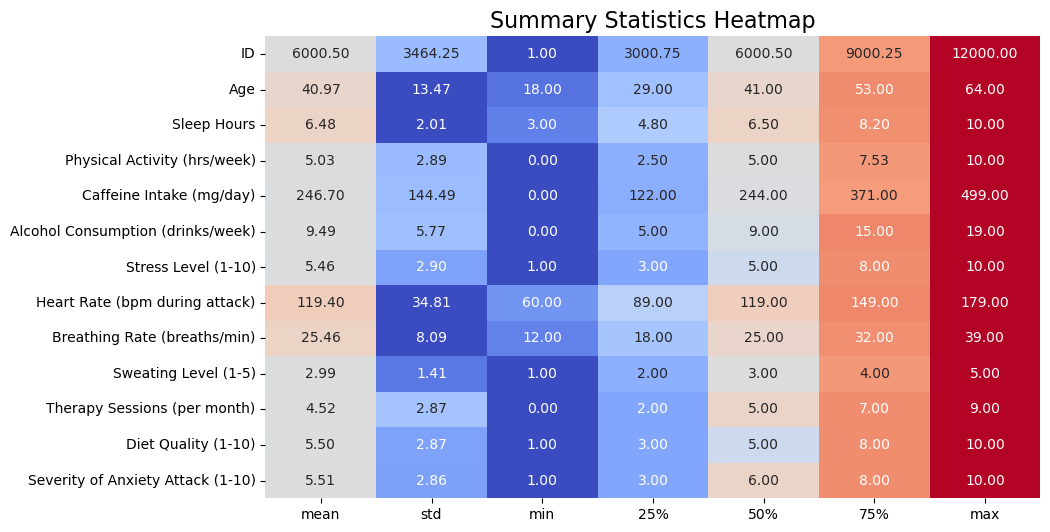

In [103]:
desc = df.describe().T
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].T).T
normalized_df = pd.DataFrame(normalized_data, columns=['mean', 'std', 'min', '25%', '50%', '75%', 'max'], index=desc.index)

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df, annot=desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], fmt='.2f', cmap='coolwarm', cbar=False)
plt.title('Summary Statistics Heatmap', fontsize=16)
plt.show()

In [104]:
colors = ['#99e2b4', '#88d4ab', '#78c6a3', '#67b99a', '#56ab91', '#469d89', '#358f80', '#248277', '#14746f', '#036666']
color_code = ['#CD5C5C', '#5BCDCD']
sns.set_palette(sns.color_palette(colors))


In [138]:
df.rename(columns={
        'Stress Level (1-10)': 'Stress',
        'Severity of Anxiety Attack (1-10)': 'Anxiety Severity',
        'Family History of Anxiety': 'Family Anxiety',
        'Physical Activity (hrs/week)': 'Physical Activity',
        'Diet Quality (1-10)': 'Diet Quality',
        'Heart Rate (bpm during attack)': 'Heart Rate',
        'Breathing Rate (breaths/min)': 'Breathing Rate',
        'Sweating Level (1-5)': 'Sweating Level'}, inplace=True)

## **Which demographic groups are most affected by anxiety attacks?**

### Age Analysis

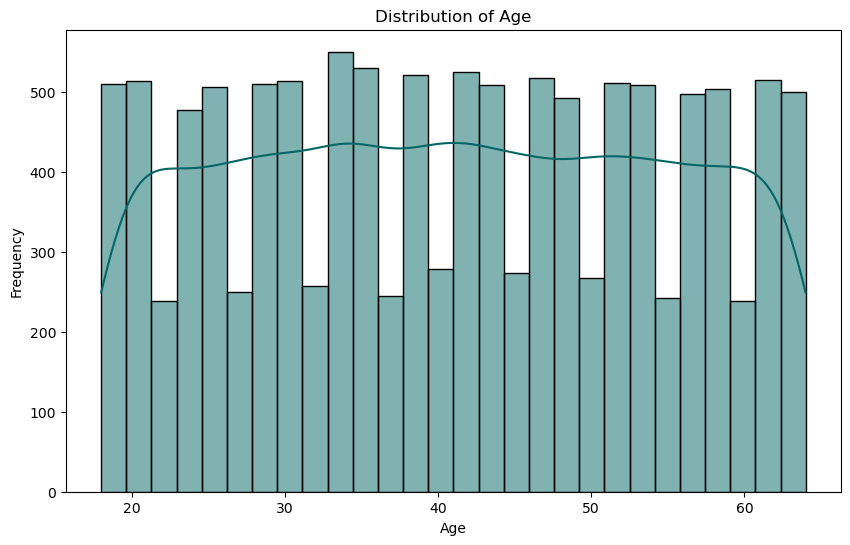

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=28, kde=True, color=colors[9])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

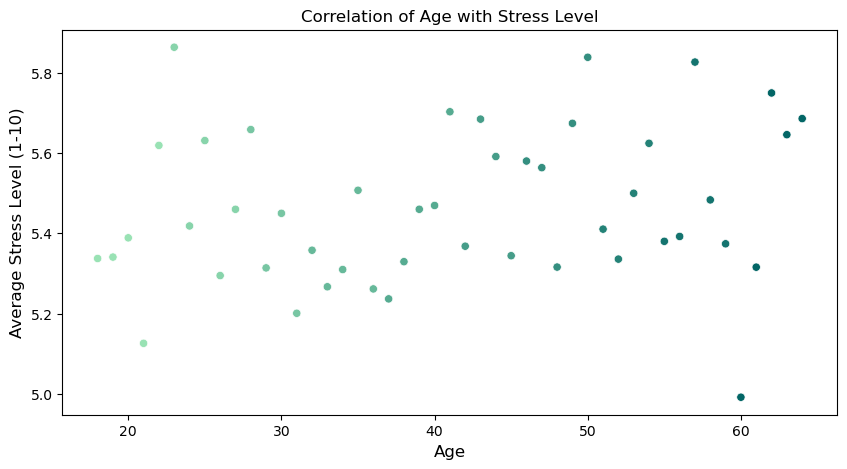

In [107]:
age_stress = df.groupby('Age')['Stress'].mean().reset_index()

plt.figure(figsize=(10, 5))
age_stress['Age_Bins'] = pd.cut(age_stress['Age'], bins=10, labels=[f'Bin {i+1}' for i in range(10)])
sns.scatterplot(data=age_stress, x='Age', y='Stress', hue='Age_Bins', palette=colors, legend=False)
plt.title('Correlation of Age with Stress Level')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Stress Level (1-10)', fontsize=12)
plt.show()

#### Observations
- Stress levels tend to increase slightly with age, peaking in the 50s to 60s age range. The upward trend in stress with age might be linked to increased responsibilities, such as financial burdens and family obligations.
- A few outliers in the younger age group show higher stress levels than the average. The outlier in younger age groups could reflect stress from life transitions, such as moving from college to a full-time job.

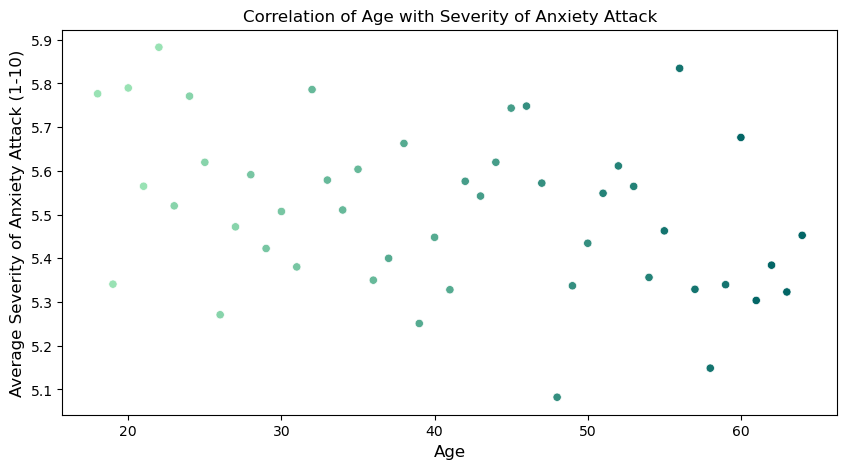

In [108]:
age_anxiety = df.groupby('Age')['Anxiety Severity'].mean().reset_index()

plt.figure(figsize=(10, 5))
age_anxiety['Anxiety_Bins'] = pd.cut(age_anxiety['Age'], bins=10, labels=[f'Bin {i+1}' for i in range(10)])
sns.scatterplot(data=age_anxiety, x='Age', y='Anxiety Severity', hue='Anxiety_Bins', palette=colors, legend=False)
plt.title('Correlation of Age with Severity of Anxiety Attack')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Severity of Anxiety Attack (1-10)', fontsize=12)
plt.show()

#### Observations
- Average severity of anxiety attacks tends to decrease as age increases.
- The highest severity scores are found in the 20 to 30 age range.
- The inverse relationship suggests that younger individuals may be more prone to severe anxiety attacks from factors such as life transitions and social pressure.

### Gender Analysis

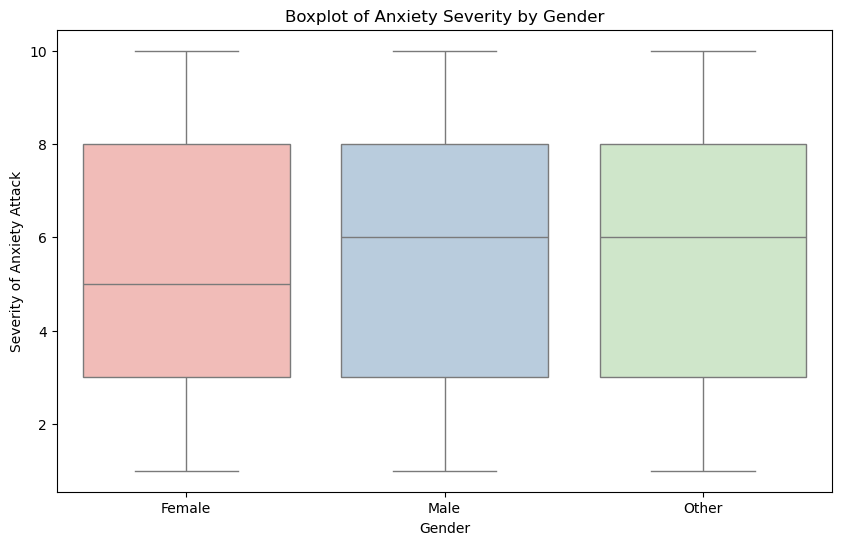

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Anxiety Severity', hue='Gender', palette="Pastel1")
plt.title('Anxiety Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Severity of Anxiety Attack')
plt.show()

#### Observations
- The IQR is similar for all groups
- The median anxiety severity is relatively lower for females 

### Family History Analysis

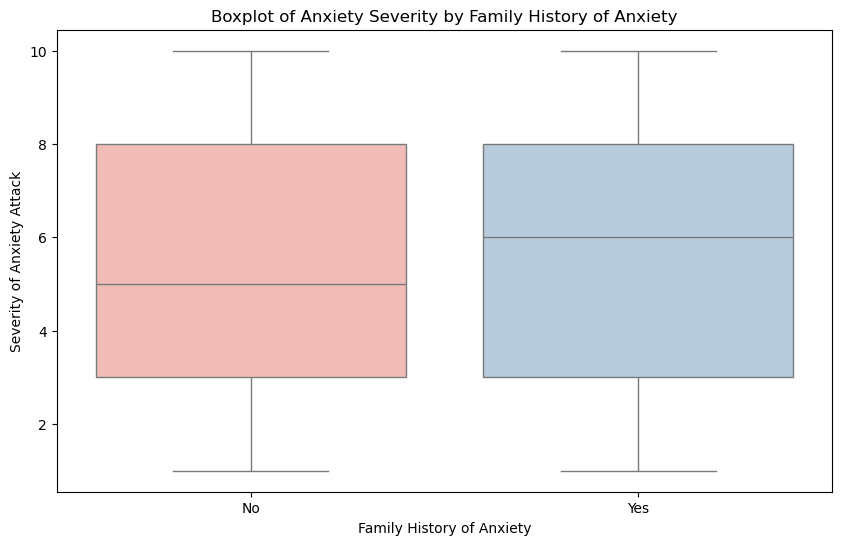

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Family Anxiety', y='Anxiety Severity', hue='Family Anxiety', palette='Pastel1')
plt.title('Anxiety Severity by Family History of Anxiety')
plt.xlabel('Family History of Anxiety')
plt.ylabel('Severity of Anxiety Attack')
plt.show()

#### Observations
- Individuals with a family history of anxiety have a higher median severity signifying that family history may be a factor in anxiety severity.

### Occupation Analysis

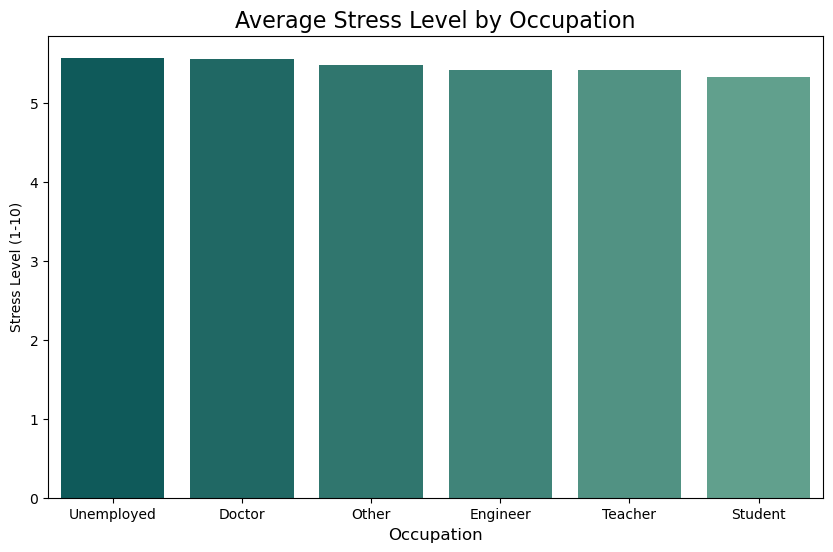

In [111]:
occupation_stress = df.groupby('Occupation')['Stress'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=occupation_stress, x='Occupation', y='Stress', hue='Occupation', palette=colors[:3:-1])
plt.title('Average Stress Level by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Stress Level (1-10)', fontsize=10)
plt.show()

#### Observations
- Overall, the average stress levels are relatively consistent across occupations.
- Unemployed individuals have the highest average stress level. This could represent the stress from their financial instability.
- Students have the lowest average stress level. This may be from the lack financial responsibility.

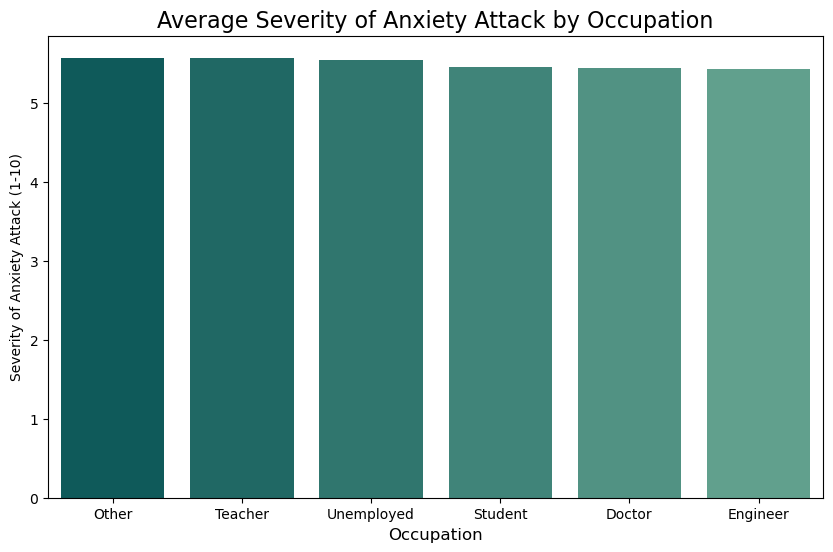

In [112]:
occupation_anxiety = df.groupby('Occupation')['Anxiety Severity'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=occupation_anxiety, x='Occupation', y='Anxiety Severity', hue='Occupation', palette=colors[:3:-1])
plt.title('Average Severity of Anxiety Attack by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Severity of Anxiety Attack (1-10)', fontsize=10)
plt.show()

#### Observations
- Overall, the average severity of anxiety attacks are relatively consistent across occupations.
- The similarity suggests that occupation is not a strong factor in determining anxiety attack severity.

## **How do lifestyle habits impact anxiety severity?**

### Sleep Analysis

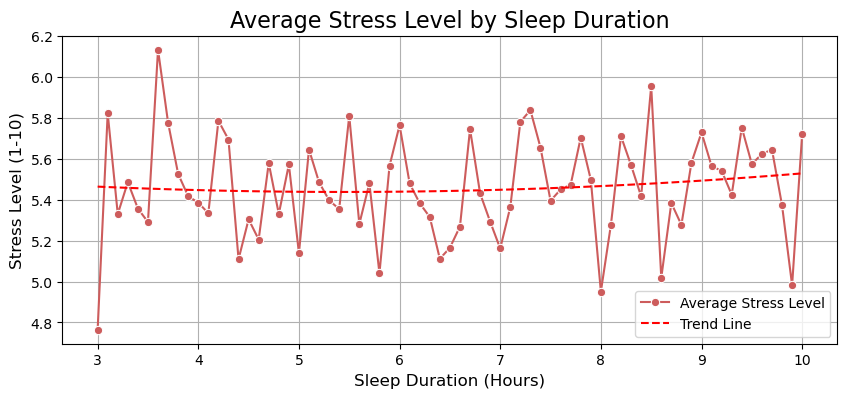

In [113]:
sleep_relationship = df.groupby('Sleep Hours')[['Stress', 'Anxiety Severity']].mean().reset_index()

x_stress = sleep_relationship['Sleep Hours']
y_stress = sleep_relationship['Stress']

trend_stress = np.poly1d(np.polyfit(x_stress, y_stress, 2))

plt.figure(figsize=(10, 4))
sns.lineplot(data=sleep_relationship, x='Sleep Hours', y='Stress', label='Average Stress Level', marker='o', color=color_code[0])
plt.plot(x_stress, trend_stress(x_stress), label='Trend Line', linestyle='--', color='red')
plt.title('Average Stress Level by Sleep Duration', fontsize=16)
plt.xlabel('Sleep Duration (Hours)', fontsize=12)
plt.ylabel('Stress Level (1-10)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### Observations
- Relatively flat relationship between sleep duration and average stress level
- No strong correlation

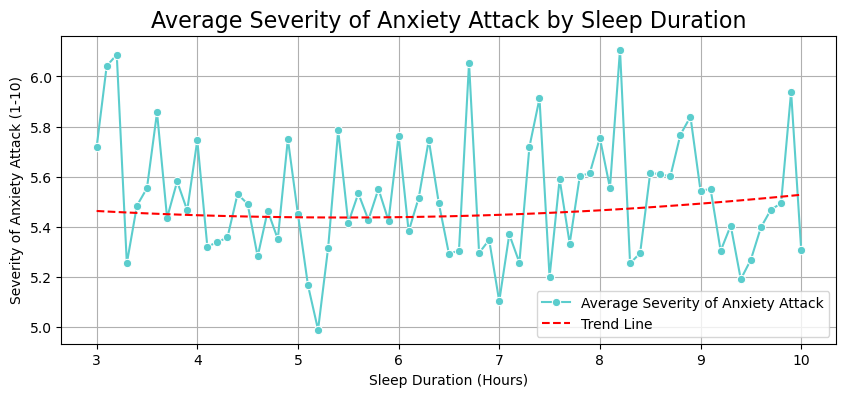

In [114]:
x_anxiety = sleep_relationship['Sleep Hours']
y_anxiety = sleep_relationship['Anxiety Severity']

trend_anxiety = np.poly1d(np.polyfit(x_anxiety, y_anxiety, 2))

plt.figure(figsize=(10, 4))
sns.lineplot(data=sleep_relationship, x='Sleep Hours', y='Anxiety Severity', label='Average Severity of Anxiety Attack', marker='o', color=color_code[1])
plt.plot(x_stress, trend_stress(x_stress), label='Trend Line', linestyle='--', color='red')
plt.title('Average Severity of Anxiety Attack by Sleep Duration', fontsize=16)
plt.xlabel('Sleep Duration (Hours)', fontsize=10)
plt.ylabel('Severity of Anxiety Attack (1-10)', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

#### Observations
- Relatively flat relationship between sleep duration and average stress level
- No strong correlation

### Physical Activity Analysis

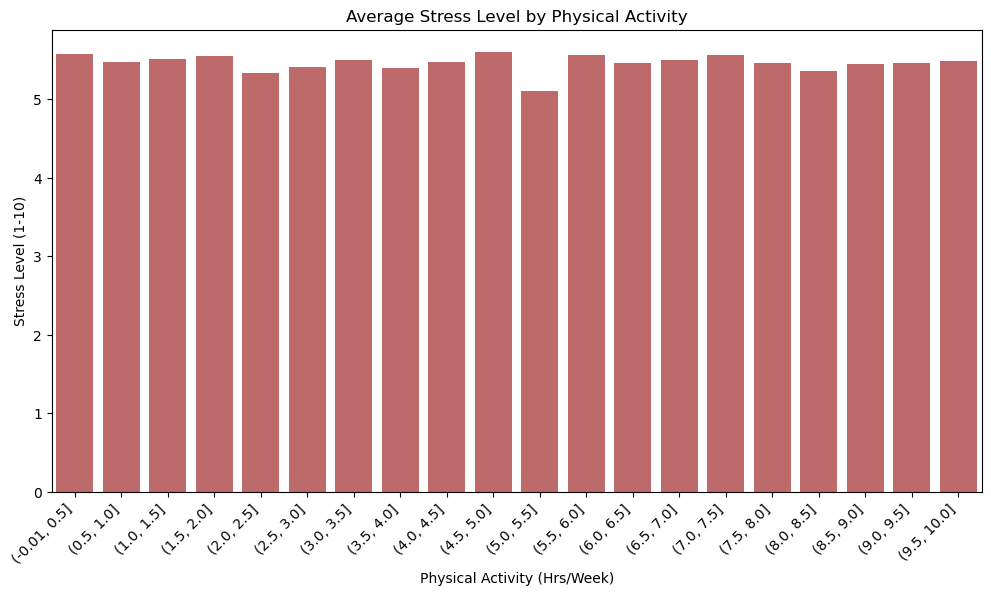

In [117]:
df['Physical Activity Bins'] = pd.cut(df['Physical Activity'], bins=20)
physical_activity_relationship = df.groupby('Physical Activity Bins', observed=True)[['Stress', 'Anxiety Severity']].mean().reset_index()
physical_activity_relationship['Physical Activity Bins'] = physical_activity_relationship['Physical Activity Bins'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=physical_activity_relationship, x='Physical Activity Bins', y='Stress', color=color_code[0])
plt.title('Average Stress Level by Physical Activity')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Physical Activity (Hrs/Week)')
plt.ylabel('Stress Level (1-10)')
plt.show()

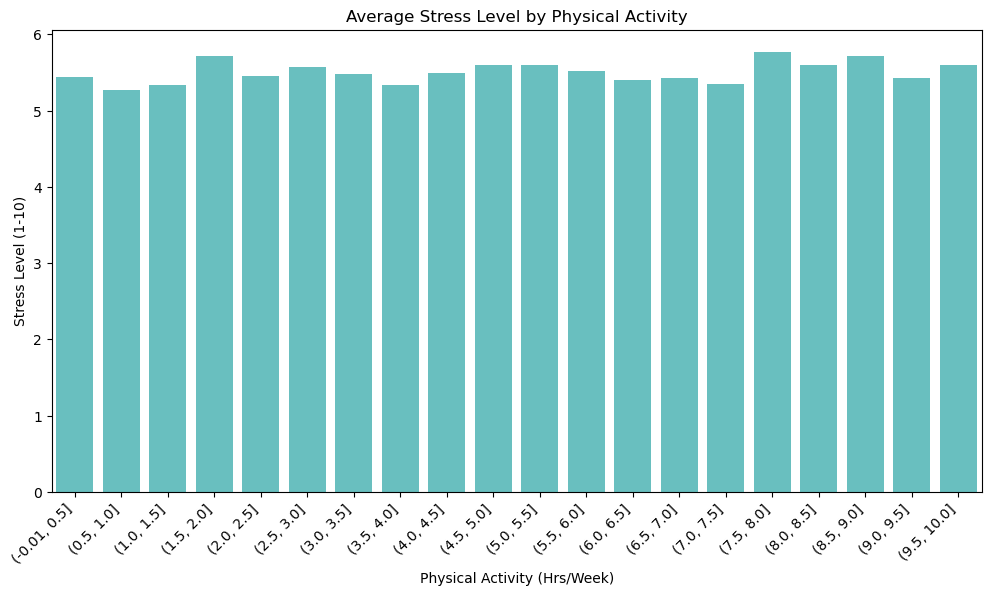

In [118]:
plt.figure(figsize=(12,6))
sns.barplot(data=physical_activity_relationship, x='Physical Activity Bins', y='Anxiety Severity', color=color_code[1])
plt.title('Average Severity of Anxiety Attack by Physical Activity')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Physical Activity (Hrs/Week)')
plt.ylabel('Severity of Anxiety Attack (1-10)')
plt.show()

### Diet Quality Analysis

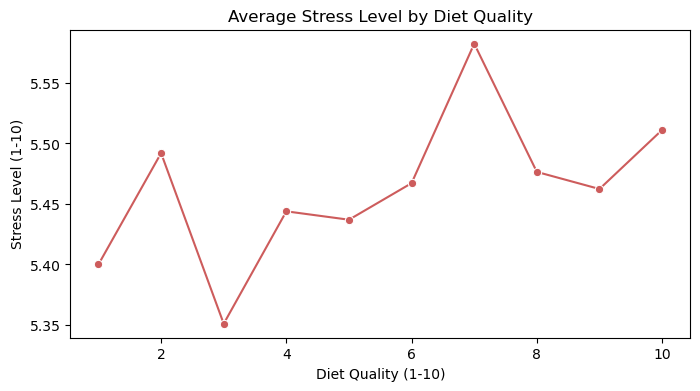

In [132]:
diet_quality = df.groupby('Diet Quality')[['Stress', 'Anxiety Severity']].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=diet_quality, x='Diet Quality', y='Stress', marker='o', color=color_code[0])
plt.title('Average Stress Level by Diet Quality')
plt.xlabel('Diet Quality (1-10)')
plt.ylabel('Stress Level (1-10)')
plt.show()

#### Observation
- Individuals with higher **Diet Quality** tend to have higher **Average Stress Level**

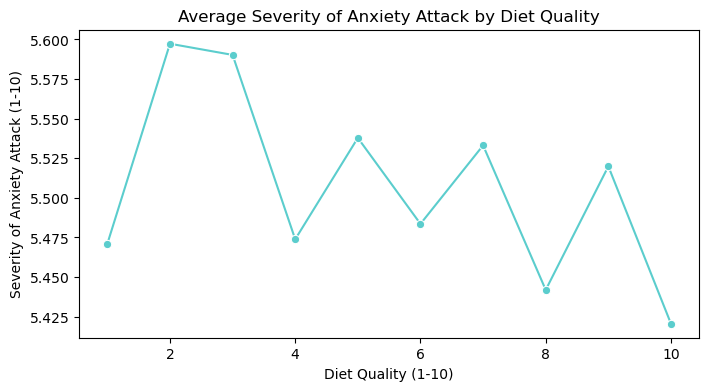

In [134]:
plt.figure(figsize=(8,4))
sns.lineplot(data=diet_quality, x='Diet Quality', y='Anxiety Severity', marker='o', color=color_code[1])
plt.title('Average Severity of Anxiety Attack by Diet Quality')
plt.xlabel('Diet Quality (1-10)')
plt.ylabel('Severity of Anxiety Attack (1-10)')
plt.show()

## **How does stress level correlate with physiological responses?** 

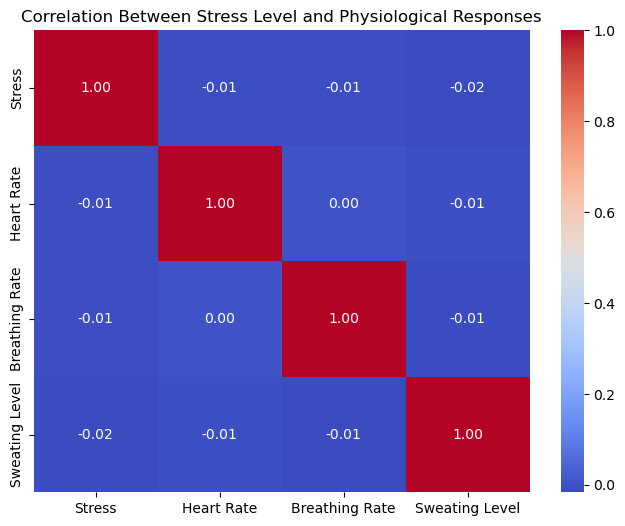

In [140]:
phys_columns = ['Stress', 'Heart Rate', 'Breathing Rate', 'Sweating Level']
cor_matrix = df[phys_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Stress Level and Physiological Responses')
plt.show()

#### Observations
- Very weak correlation between physiological response vars
- Correlation coefficients are near zero (no strong linear relationship)

## **Do external factors (medication, therapy, life events) influence anxiety severity?** 

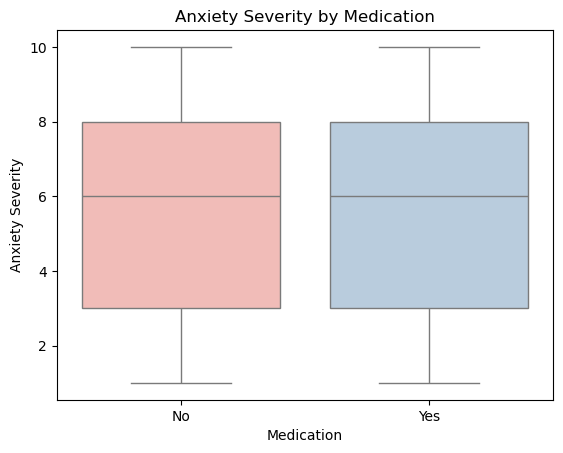

In [143]:
sns.boxplot(data=df, x='Medication', y='Anxiety Severity', hue='Medication', legend=False, palette="Pastel1")
plt.title('Anxiety Severity by Medication')
plt.show()

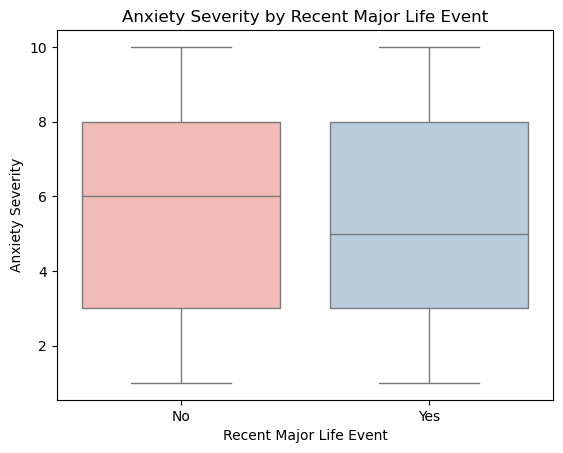

In [152]:
sns.boxplot(data=df, x='Recent Major Life Event', y='Anxiety Severity', hue='Recent Major Life Event', order=['No', 'Yes'],legend=False, palette={"Yes": "#b3cde3", "No": "#fbb4ae"})
plt.title('Anxiety Severity by Recent Major Life Event')
plt.show()